# Preprocessing script

The task of this script is to perform the preprocessing of the input data

In [1]:
# import all the required packages

import PIL 
from PIL import Image
from __future__ import print_function
import os
import numpy as np
from scipy import ndimage # required for loading images into the dataset
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

In [2]:
# set the paths required for the script to work:
root = "../Data/"
pindown_path = os.path.join(root,"PinDown__precisionistprecisionism-art")

## Perform the resizing of all the images:
the input images do not have a standard size, so we will have to resize them and use them accordingly

In [3]:
# The following function converts all the images to standard sized images
def resize(path, ori_path, size):
    # counters for processed files
    count = 0 
    faulty_files = 0
    
    # check if the directory already exists 
    if(not os.path.exists(path)):
        os.mkdir(path)
        
        folders = sorted(os.listdir(ori_path)) 
        for folder in folders:
            
            images = sorted(os.listdir(os.path.join(ori_path, folder)))
        
            for image in images:
                image_file_path = ori_path + "/" + folder + "/" + image
                try:
                    img = Image.open(image_file_path) # throws IOError    
                    img = img.resize((size, size), PIL.Image.ANTIALIAS)
                    img.save(path + "/" + folder + "%" + image)

                except IOError: # if IOError is thrown, then the image is faulty
                    print("image %s is faulty" %(image_file_path))
                    faulty_files += 1 
                    continue


                if(count % 100 == 0):
                    print("Working on %dth image" %(count))

                count += 1

    else:
        print("path %s already exists" %(path))
    
    # print the statistical output of the process
    print("Total Files normalized: %d\nFaulty Files: %d\n" %(count, faulty_files))

In [4]:
# convert the training images to 100 x 100 sized images: 
resize(os.path.join(root, "resized_pindown_images"), pindown_path, 100)

Working on 0th image
Working on 100th image
Working on 200th image
Working on 300th image
Working on 400th image
Working on 500th image
Working on 600th image
Working on 700th image
Working on 800th image
Working on 900th image
Working on 1000th image
Working on 1100th image
Working on 1200th image
Working on 1300th image
Working on 1400th image
Working on 1500th image
Working on 1600th image
Working on 1700th image
Working on 1800th image
Working on 1900th image
Working on 2000th image
Working on 2100th image
Working on 2200th image
Working on 2300th image
Working on 2400th image
Working on 2500th image
Working on 2600th image
Working on 2700th image
Total Files normalized: 2784
Faulty Files: 0



In [5]:
# set the path for the resized images
resized_images_path = os.path.join(root, "resized_pindown_images")

'''Set a few constants for the further script'''

image_size = 100  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.
image_depth = 3 # coloured images in RGB format 

## Load the image based data into ND-Array:
the input images are in RGB format; so we will extract the data from the R, G and B channel and load them as numpy arrays.

In [6]:
def load_data(folder, min_num_images, MeanNormalize=False):
    """Load the data from the provided folder"""
    # get all the images from the folder
    image_files = os.listdir(folder)

    # create n dimensional arrays for the images and their numbers
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size, image_depth),
                         dtype=np.float32) 
    
    image_labels = []
    
    print("Loading Images from %s" %folder) # feedback message
  
    num_images = 0 # counter for number of images
    
    for image in image_files: # enter the main loop
        image_file = os.path.join(folder, image) # path of file 
        try:
            # normalize the image pixel values around its mean
            if MeanNormalize:
                image_data = (ndimage.imread(image_file).astype(float) - 
                            pixel_depth / 2) / pixel_depth
            else:
                image_data = ndimage.imread(image_file).astype(float)
            
            if image_data.shape != (image_size, image_size, image_depth):#removing grayscale images
                print('Unexpected image shape: %s of image %s\nIts ok, skipping it' % 
                                (str(image_data.shape), image_file))
                continue
            
            dataset[num_images, :, :, :] = image_data
            
            # extract the label and assign it.
            label = image.split("%")[0].split("__")[1]
            
            image_labels.append(label)
                            
            num_images = num_images + 1
        except IOError as e:
              print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
    dataset = dataset[0:num_images, :, :, :] # exclude the place holder for the faulty images
    image_labels = image_labels[0: num_images]
    
    if num_images < min_num_images:
        raise Exception('Many fewer images than expected: %d < %d' %(num_images, min_num_images))
    
    print('Full dataset tensor:', dataset.shape)
    print('Mean:', np.mean(dataset))
    print('Standard deviation:', np.std(dataset))
    return dataset, image_labels

In [9]:
# load the Resized images
try:
    train_dataset, train_labels = load_data(resized_images_path, 2000)
    
except Exception as e:
    print('Error occured: ', e)

Loading Images from ../Data/resized_pindown_images
Unexpected image shape: (100, 100) of image ../Data/resized_pindown_images/PinDown__Colour-Field-Painting%19d24eaab4c272f52d4b3c4ebddc0eb3.jpg
Its ok, skipping it
Unexpected image shape: (100, 100) of image ../Data/resized_pindown_images/PinDown__Op-Art%48d5c8e735cab8a80ed24daffd38f31c.jpg
Its ok, skipping it
Unexpected image shape: (100, 100) of image ../Data/resized_pindown_images/PinDown__Op-Art%2ffe0e51d4b97633e0c1ee71f6524a86.jpg
Its ok, skipping it
Unexpected image shape: (100, 100) of image ../Data/resized_pindown_images/PinDown__Minimalism-Art%1f6112c597805d3a71ccdcff278a407e.jpg
Its ok, skipping it
Unexpected image shape: (100, 100) of image ../Data/resized_pindown_images/PinDown__Op-Art%5c6c5ab27c01a3a4d3658b37fa1d5e8a.jpg
Its ok, skipping it
Unexpected image shape: (100, 100) of image ../Data/resized_pindown_images/PinDown__Minimalism-Art%f0c1b59706759836093e26e2b3fa0ab7.jpg
Its ok, skipping it
Unexpected image shape: (100, 

In [10]:
train_labels[10: 20]

['Action-Painting',
 'Colour-Field-Painting',
 'Hard-Edge-Art',
 'Op-Art',
 'art--Expressionism',
 'Cubism',
 'Post-impressionism',
 'Post-impressionism',
 'Op-Art',
 'Post-impressionism']

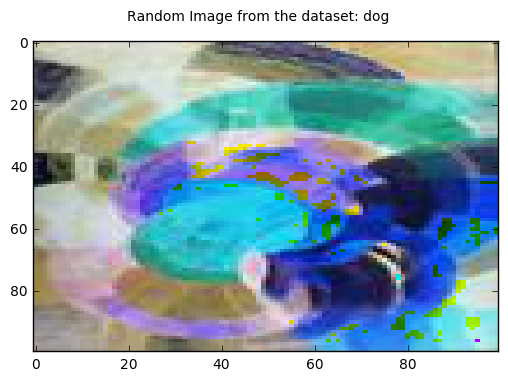

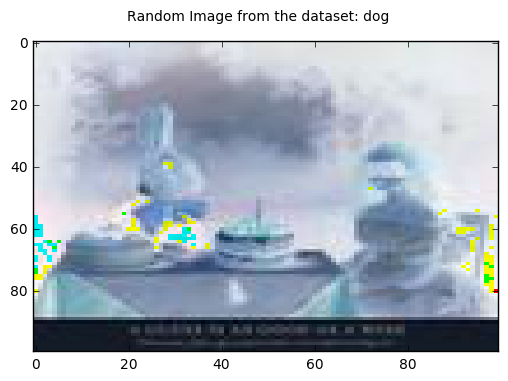

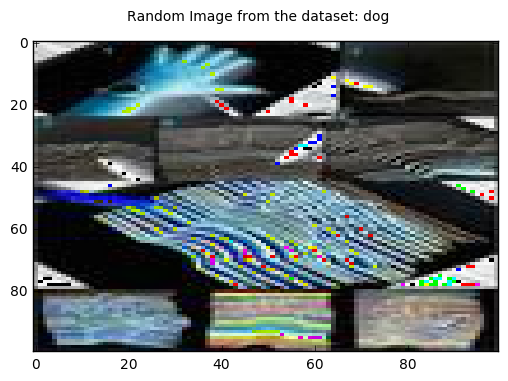

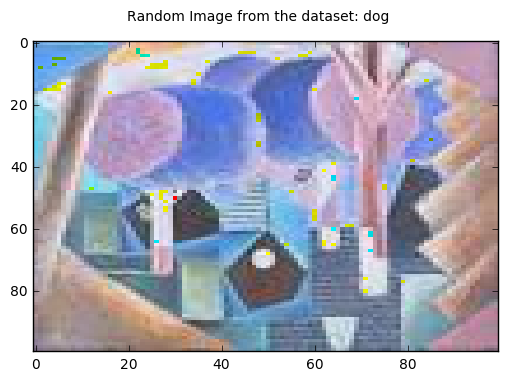

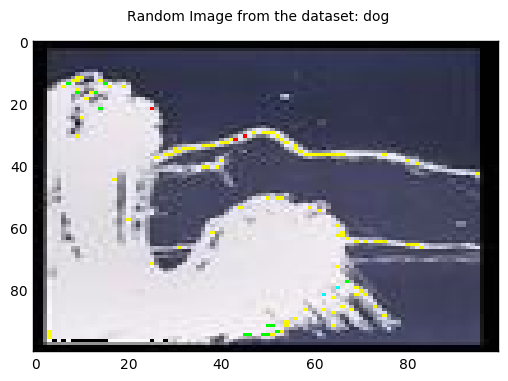

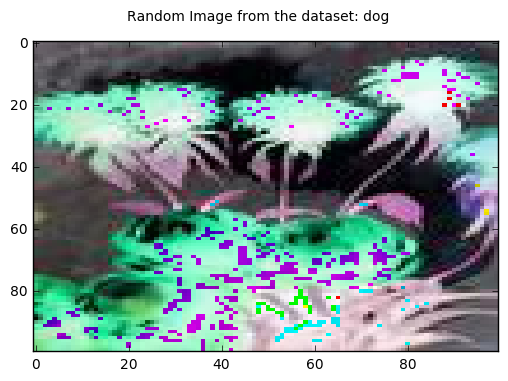

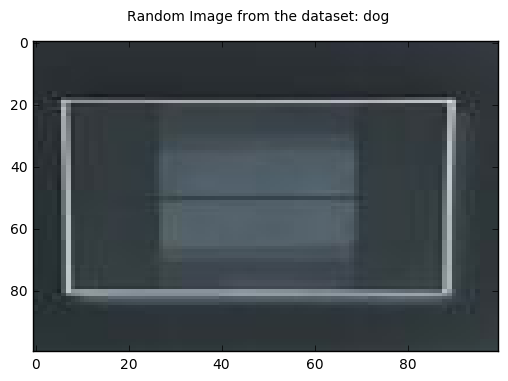

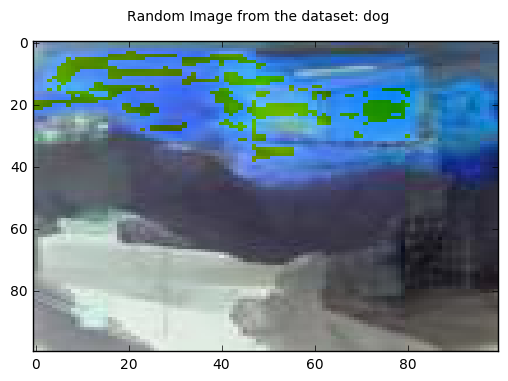

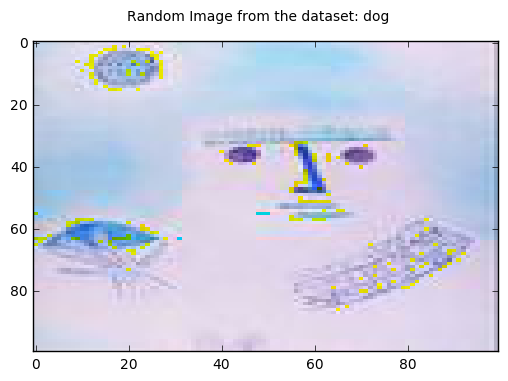

In [11]:
# display 10 random images from the numpy version of the dataset
for i in range(1, 10):
    random_index = np.random.randint(train_dataset.shape[0])
    
    label = train_labels[random_index]
    
    plt.figure().suptitle("Random Image from the dataset: %s" %(label))
    plt.imshow(train_dataset[random_index], interpolation='none', aspect='auto')


## Pickling the preprocessed data:
We will now generate one hot encoded labels and then pickle the data into a pickle file

In [ ]:
# create a dictionary of mapping from labels to data encoders
label_mappings = dict(enumerate(sorted(set(train_labels))))

# reverse the mappings
label_mappings = dict([(label_mappings[k], k) for k in label_mappings.keys()])

# just for fun:
label_mappings

In [ ]:
# function to hot encode the labels
def hot_encode(labels):
    encoded_labels = [[0 for i in range(0, len(label_mappings))] for j in range(0, len(labels))]
    for i in range(0, len(labels)):
        encoded_labels[i][label_mappings[labels[i]]] = 1
    return np.array(encoded_labels, dtype=np.float32)

In [ ]:
encoded_train_labels = hot_encode(train_labels)
# print a few encoded and non encoded train_labels
print(train_labels[:6])
encoded_train_labels[:6]

In [ ]:
''' For pickling the data acquired till now '''

# data dictionary


training_percentage = 70
cross_validation_percentage = 10
# remaining = test data

train_partition = (len(train_dataset) * training_percentage) / 100
cv_partition = (len(train_dataset) * (training_percentage + cross_validation_percentage)) / 100

data_dict = {
    "train_data" : train_dataset[: train_partition],
    "train_labels" : encoded_train_labels[: train_partition],
    "cv_data" : train_dataset[train_partition: cv_partition],
    "cv_labels" : encoded_train_labels[train_partition: cv_partition],
    "test_data" : train_dataset[cv_partition : ],
    "test_labels" : encoded_train_labels[cv_partition : ],
    
    "label_mapping" : label_mappings
}

if(not os.path.isfile(os.path.join(root, "Data_pindown.pickle"))):
    with open(os.path.join(root, "Data_pindown.pickle"), "wb") as pickle_file:
        pickle.dump(data_dict, pickle_file, pickle.HIGHEST_PROTOCOL)
        print("Pickling complete")
        
else:
    print("data is already pickled")

In [ ]:
# naive checking of the integrity of the pickled data

with open(os.path.join(root, "Data_pindown.pickle"), "rb") as pickle_file:
    my_dict = pickle.load(pickle_file)
    
len(my_dict)